<a href="https://colab.research.google.com/github/FGalvao77/Aplicacoes-do-XGBoost-com-Scikit-learn/blob/main/Aplica%C3%A7%C3%B5es_do_XGBoost_com_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicações do `XGBoost` com _Scikit-learn_**

---



**Modelos de:**

- Regressão
 - Binária
 - Multiclasses<br><br>
- Classificação<br><br><br>

**Estratégias como:**
- Validação cruzada
- Otimização dos hiperparâmetros
 - procura pelos melhores ajustes
- Importância do recurso
- Parada do modelo
- Métodos de avaliação
- Visualização gráfica 

In [1]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# biblioteca para manipulação e análise de dados
import pandas as pd

# biblioteca matemática de alto nível para operar sobre matrizes
import numpy as np 

# funções estatísticas:
## uniform - variável aleatória contínua uniforme
## randint - variável aleatória discreta uniforme
from scipy.stats import uniform, randint

# funções para analisar dados, medir novos dados, selecionar modelo, gerar resultados, fazer previsão
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, RepeatedKFold

# funções de avalições do modelo
from sklearn.metrics import (auc, 
                             roc_auc_score ,
                             roc_curve,
                             accuracy_score,  
                             mean_squared_error, 
                             r2_score, 
                             mean_absolute_error, 
                             classification_report,
                             confusion_matrix, 
                             plot_confusion_matrix)

# biblioteca do modelo
import xgboost as xgb

In [3]:
# importando os conjunto de dados
from sklearn.datasets import load_boston, load_breast_cancer, load_diabetes, load_wine

In [4]:
# biblioeteca para visualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Regressão**

### **Diabetes Dataset**

In [5]:
# carregando o conjunto de dados na variável "diabetes"
diabetes = load_diabetes()

In [6]:
# visualizando o tipo do objeto
type(diabetes)

sklearn.utils.Bunch

In [7]:
# visualizando o conteúdo do objeto 
diabetes 

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

> Podemos visualizar que o objeto é um dicionário com dados.

In [8]:
# visualizando de forma estruturada o objeto
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
# criando um dataframe com o dicionário de dados
df_diabetes = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names
)

# inserindo a variável alvo no dataframe criado
df_diabetes['outcome'] = diabetes.target

# visualizando as 5 primeiras linhas
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
# há valores nulos e/ou faltantes?
df_diabetes.isnull().sum()

age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
outcome    0
dtype: int64

> Não há dados nulos/faltantes!

Se acaso houvesse valores nulos e/ou faltantes teríamos que trata-los.<br>
Para isso, poderíamos adotar as seguintes estratégias:
- preencher os campos faltantes com a moda ou a média dos valores do atributo em questão;
- eliminar as linhas e/ou as coluna(s).

E qual a melhor estratégia?<br>
Essa resposta depende do `feeling` e do `problema do negócio` que o _Cientista de Dados_ está tentando resolver.

In [11]:
# eliminando campos/linhas com valores nulos/faltantes 
# df_diabetes.dropna(inplace=True, axis=1)

In [12]:
# com a função ".any()" temos o retorno boleano
df_diabetes.isnull().sum().any()

False

In [13]:
# informações gerais
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  outcome  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [14]:
# inspecionando a variável alvo
print(
    df_diabetes['outcome'].value_counts().head(10),
    df_diabetes['outcome'].value_counts(normalize=True).head(10),
    sep='\n\n'
)

200.0    6
72.0     6
178.0    5
90.0     5
71.0     5
202.0    4
85.0     4
131.0    4
59.0     4
65.0     4
Name: outcome, dtype: int64

200.0    0.013575
72.0     0.013575
178.0    0.011312
90.0     0.011312
71.0     0.011312
202.0    0.009050
85.0     0.009050
131.0    0.009050
59.0     0.009050
65.0     0.009050
Name: outcome, dtype: float64


In [15]:
# estatística descritiva dos dados
df_diabetes.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,outcome
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [16]:
# correlação entre as variáveis
df_diabetes.corr().round(4)*100

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,outcome
age,100.00,17.37,18.51,33.54,26.01,21.92,-7.52,20.38,27.08,30.17,18.79
sex,17.37,100.00,8.82,24.10,3.53,14.26,-37.91,33.21,14.99,20.81,4.31
bmi,18.51,8.82,100.00,39.54,24.98,26.12,-36.68,41.38,44.62,38.87,58.65
bp,33.54,24.10,39.54,100.00,24.25,18.56,-17.88,25.77,39.35,39.04,44.15
s1,26.01,3.53,24.98,24.25,100.00,89.67,5.15,54.22,51.55,32.57,21.20
s2,21.92,14.26,26.12,18.56,89.67,100.00,-19.65,65.98,31.84,29.06,17.41
s3,-7.52,-37.91,-36.68,-17.88,5.15,-19.65,100.00,-73.85,-39.86,-27.37,-39.48
s4,20.38,33.21,41.38,25.77,54.22,65.98,-73.85,100.00,61.79,41.72,43.05
s5,27.08,14.99,44.62,39.35,51.55,31.84,-39.86,61.79,100.00,46.47,56.59
s6,30.17,20.81,38.87,39.04,32.57,29.06,-27.37,41.72,46.47,100.00,38.25


In [17]:
# correlação das variáveis numéricas entre a variável alvo
df_diabetes.corr()['outcome'].round(4)*100

age         18.79
sex          4.31
bmi         58.65
bp          44.15
s1          21.20
s2          17.41
s3         -39.48
s4          43.05
s5          56.59
s6          38.25
outcome    100.00
Name: outcome, dtype: float64

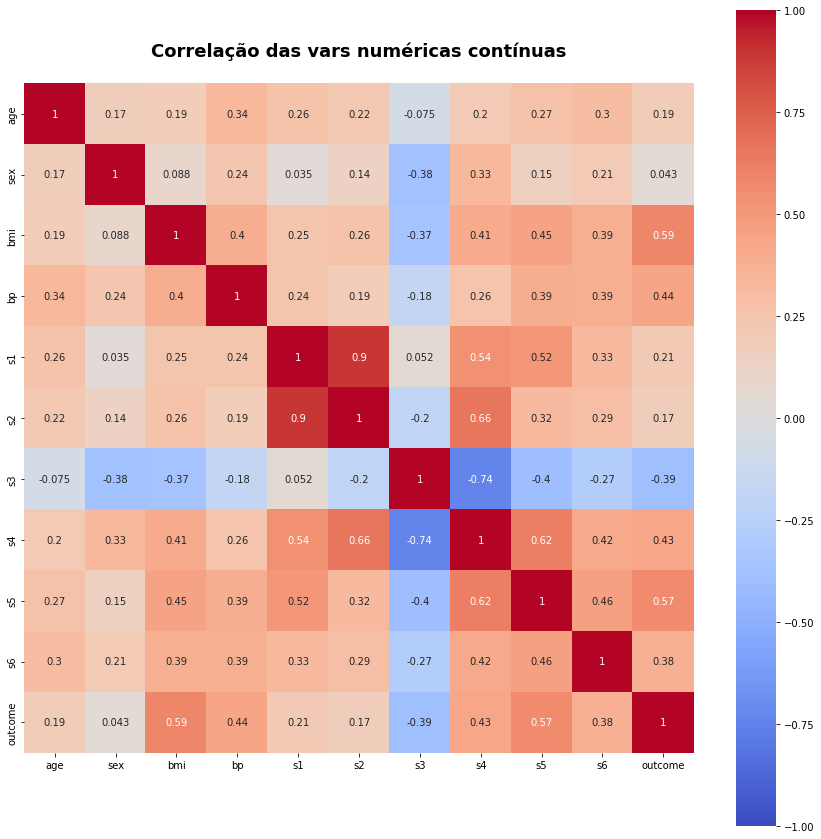

In [18]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize = (15, 15))
sns.heatmap(df_diabetes.corr(), cmap = 'coolwarm', vmin = -1.0, 
            annot = True, vmax = 1.0, square=True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

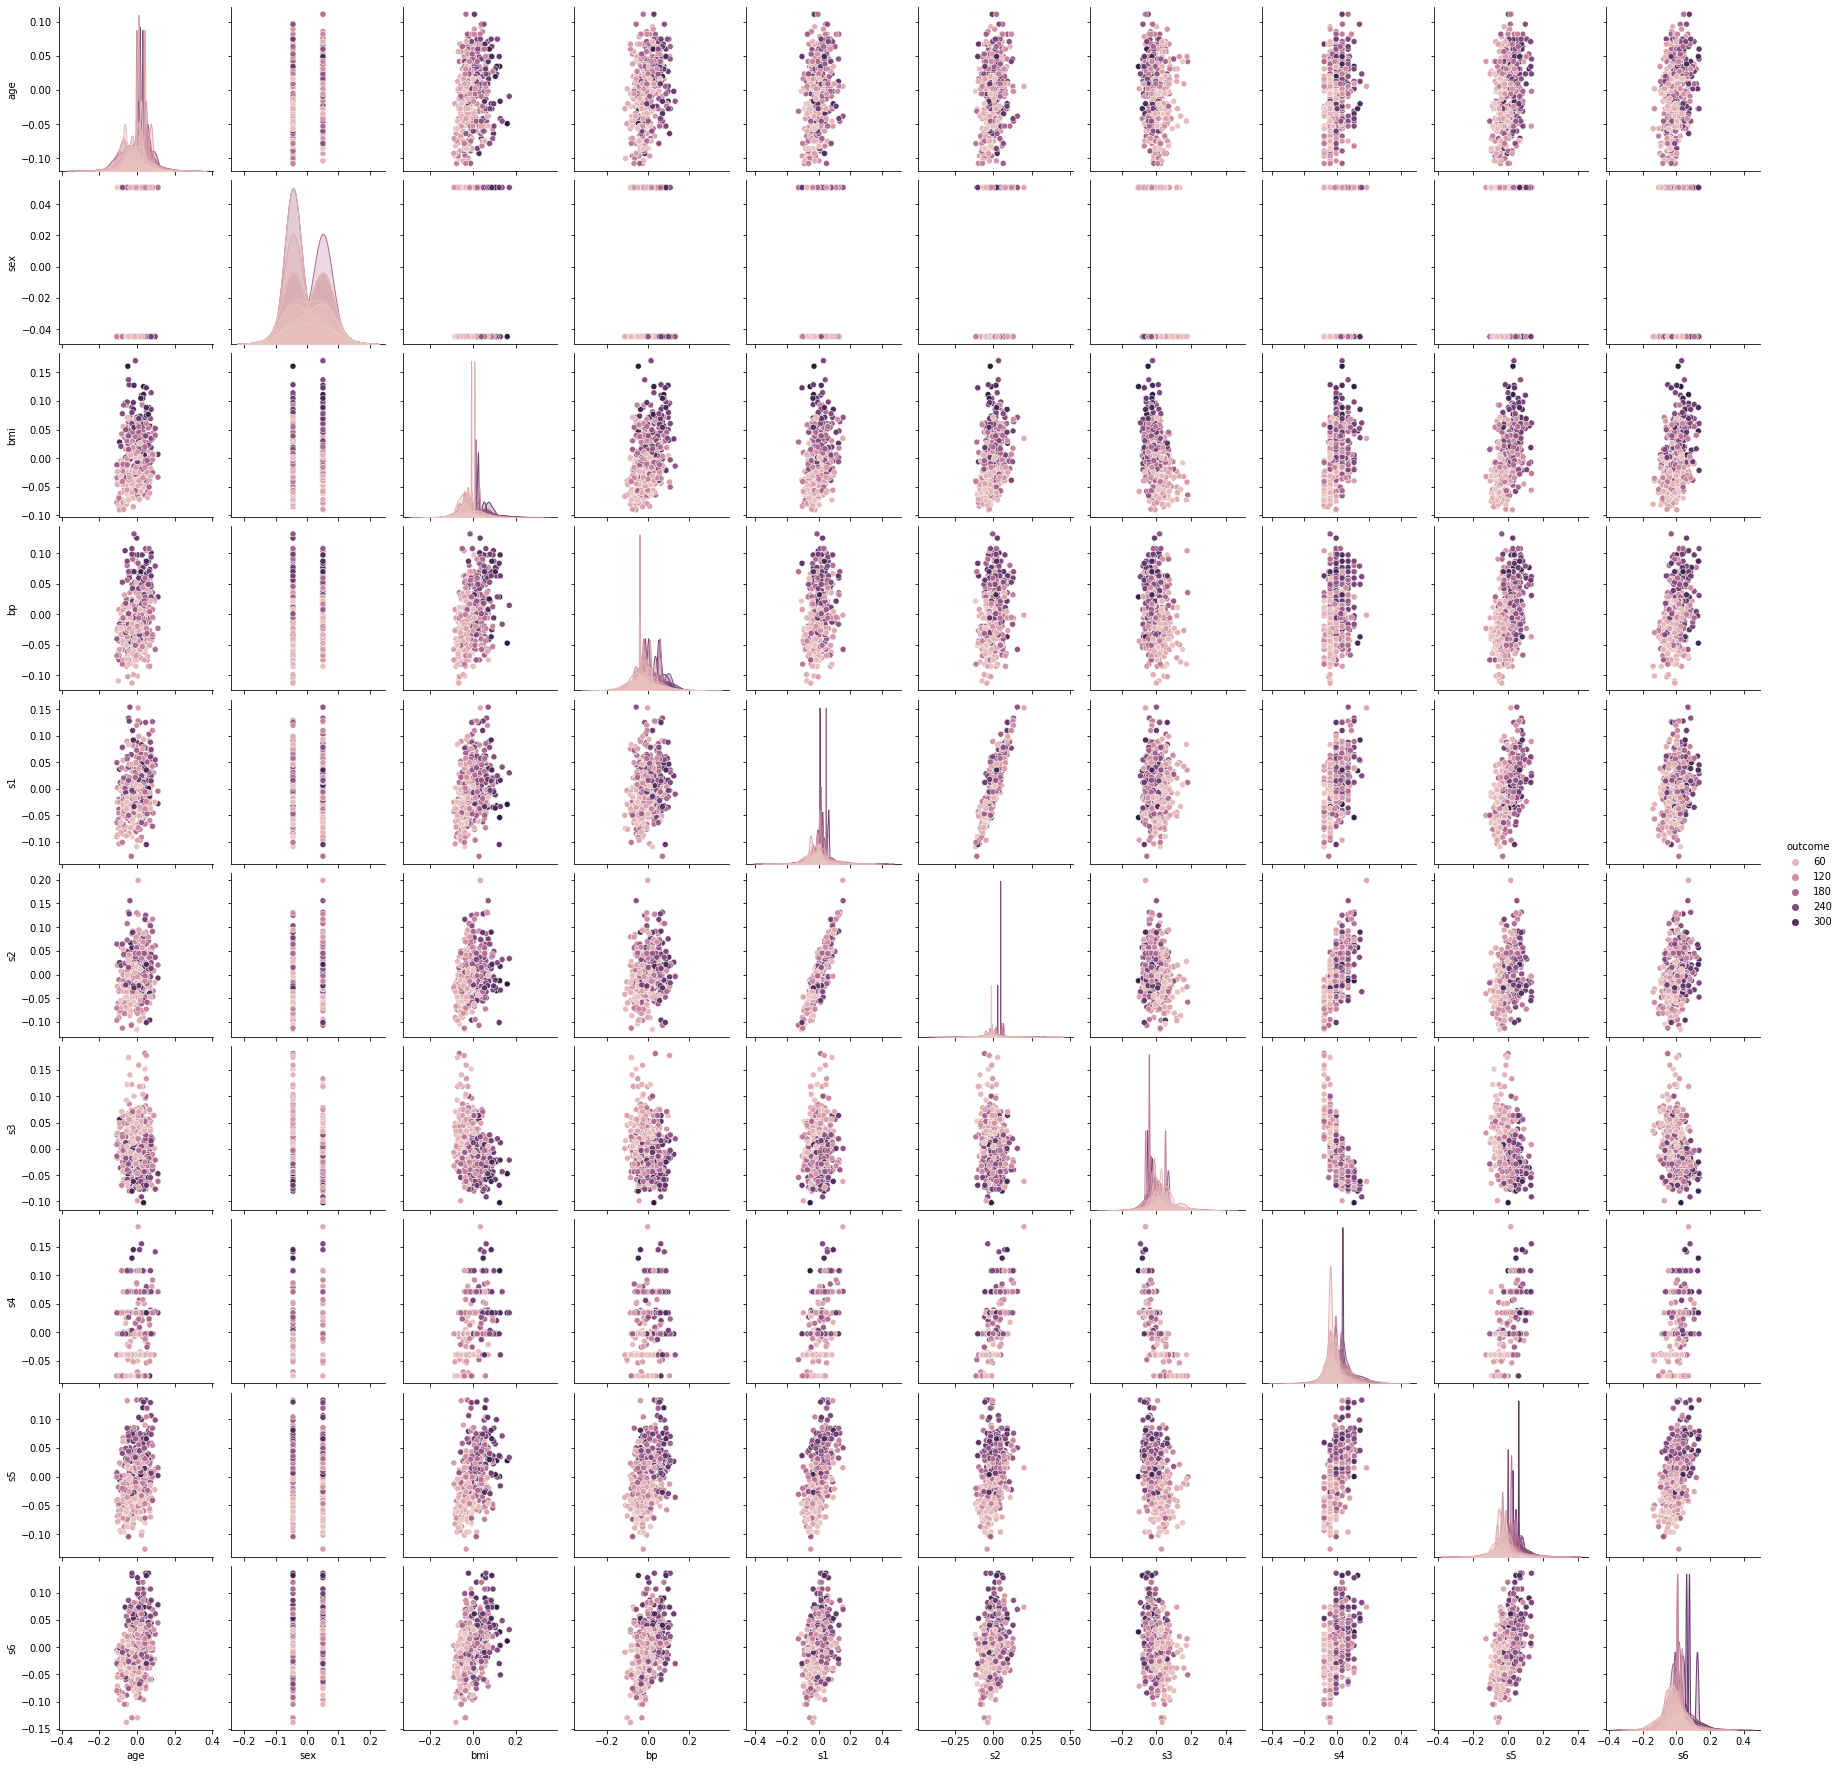

In [19]:
# com a função ".pairplot()" da biblioteca seaborn plotando diversos gráficos
sns.pairplot(data=df_diabetes, hue='outcome');

In [20]:
# realizando um ponto de corte da correlação entre as variáveis - maior e/ou igual a 0.4
vars_num_corr = df_diabetes.corr()['outcome'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.4].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (outcome). \nSegue:')
important_feats

Há 4 atributos com forte correlação com a variável alvo (outcome). 
Segue:


bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
Name: outcome, dtype: float64

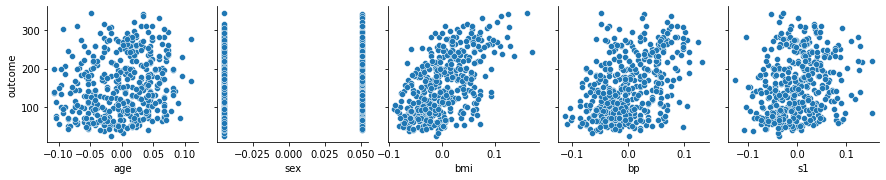

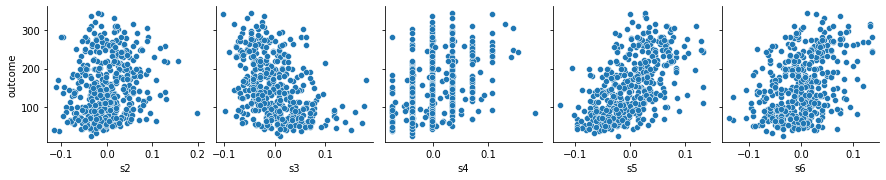

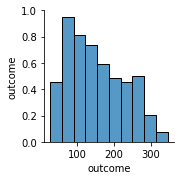

In [21]:
# plotando gráfico de correlação 
for i in range(0, len(df_diabetes.columns), 5):
    sns.pairplot(data=df_diabetes, x_vars=df_diabetes.columns[i:i + 5], 
                 y_vars=['outcome']);

In [22]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X = df_diabetes.drop('outcome', axis=1)
y = df_diabetes['outcome']

In [23]:
# instanciando os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.3, # reservando 30% para teste
                                                random_state=42)

**Aplicando o modelo básico (baseline)**

In [24]:
# instanciando um modelo base (baseline)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             random_state=42)

In [25]:
# treinando o modelo com os dados de treino - Xtrain e ytrain
xgb_model.fit(Xtrain, ytrain)

# realizando as predições com o modelo após seu treinamento
ypred = xgb_model.predict(Xtest)

In [26]:
# métricas de avaliação do modelo
print(
    f'Erro Quadrático Médio (MSE): {mean_squared_error(ytest, ypred).round(3)}',                    
    f'Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mean_squared_error(ypred, ytest)).round(3)}',                                         
    f'Erro Absoluto Médio (MAE): {mean_absolute_error(ytest, ypred).round(3)}',
    f'R-Quadrado (R2): {r2_score(ytest, ypred).round(3)}',  
    sep='\n'                       
)

Erro Quadrático Médio (MSE): 3531.859
Raiz do Erro Quadrático Médio (RMSE): 59.429
Erro Absoluto Médio (MAE): 47.511
R-Quadrado (R2): 0.378


In [27]:
# função para ajuste do R2
def adjusted_r2(ytest, ypred, Xtrain):
    
  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(ytest, ypred)) * (len(ytest) - 1)) / 
          (len(ytest) - Xtrain.shape[1] - 1))
    
  return adj_r2

In [28]:
# visualizando o resultado do R2 ajustado
print(f'R2 ajustado: {adjusted_r2(ytest, ypred, Xtrain).round(3)}')

R2 ajustado: 0.358


**Ajustando manualmente os hiperparâmetros do XGBoost**

In [29]:
# ajustando os hiperparâmetros do modelo
xgb_model = xgb.XGBRegressor(learning_rate=0.08,
                             n_estimators=1_500,
                             max_depth=6,
                             min_child_weight=4,
                             subsample=0.9,
                             colsample_bynode=0.5,
                             random_state=42, 
                             num_parallel_tree=3,
                             booster='gbtree',
                             objective='reg:squarederror',
                             n_jobs=-1,
                            #  gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #  tree_method='exact'   
                            ) 

In [30]:
# treinando e realizando as prediçẽos com o modelo e seus hiperparâmetros ajustados
xgb_model.fit(Xtrain, ytrain)
ypred = xgb_model.predict(Xtest)

In [31]:
# métricas de avaliação do modelo
print(
    f'Erro Quadrático Médio (MSE): {mean_squared_error(ytest, ypred).round(3)}',                    
    f'Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mean_squared_error(ypred, ytest)).round(3)}',                                         
    f'Erro Absoluto Médio (MAE): {mean_absolute_error(ytest, ypred).round(3)}',
    f'R-Quadrado (R2): {r2_score(ytest, ypred).round(3)}',  
    sep='\n'                       
)

Erro Quadrático Médio (MSE): 3438.076
Raiz do Erro Quadrático Médio (RMSE): 58.635
Erro Absoluto Médio (MAE): 46.731
R-Quadrado (R2): 0.395


In [32]:
# função para ajuste do R2
def adjusted_r2(ytest, ypred, Xtrain):
    
  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(ytest, ypred)) * (len(ytest) - 1)) / 
          (len(ytest) - Xtrain.shape[1] - 1))
    
  return adj_r2

In [33]:
# visualizando o resultado do R2 ajustado
print(f'R2 ajustado: {adjusted_r2(ytest, ypred, Xtrain).round(3)}')

R2 ajustado: 0.375


**Validação cruzada**

_Usando o `KFold`._

In [34]:
# instanciando as variaveis explicativas e  a resposta
X = diabetes.data
y = diabetes.target

In [35]:
# instanciando o KFold e seus argumentos
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [36]:
# realizando um "for" e salvando os resultados em uma lista
scores = []

for train_index, test_index in kfold.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(learning_rate=0.08,
                             n_estimators=1_500,
                             max_depth=6,
                             min_child_weight=4,
                             subsample=0.9,
                             colsample_bynode=0.5,
                             random_state=42, 
                             num_parallel_tree=3,
                             booster='gbtree',
                             objective='reg:squarederror',
                             n_jobs=-1,
                            #  gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #  tree_method='exact'   
                            ) 
    
    xgb_model.fit(Xtrain, ytrain)
    ypred = xgb_model.predict(Xtest)

    scores.append(mean_squared_error(ytest, ypred))

In [37]:
# função para visualizar as métricas
def display_scores(scores):
    print('Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}'.format(scores, 
                                                            np.mean(scores), 
                                                            np.std(scores)))

In [38]:
# aplicando a função e visualizando os resultados
display_scores(np.sqrt(scores))

Scores: [55.78273638 62.26167066 52.92906599 67.69473637 71.71516578 62.75909642
 54.06995802 64.28807521 59.90255993 58.79536995]
Mean: 61.020
Std: 5.671


**Validação cruzada com `cross_val_score`**

In [39]:
# aplicando o "cross_val_socore"
scores = cross_val_score(xgb_model, 
                         X, y,
                         scoring='neg_mean_squared_error',
                         cv=10)

In [40]:
# aplicando a função "display_scores" e visualizando os resultados
display_scores(np.sqrt(-scores))

Scores: [60.32410674 59.62647965 60.81375229 58.97098878 63.41066644 63.89405677
 60.71048665 56.47496551 72.30140539 53.22045306]
Mean: 60.975
Std: 4.790


**Encontrando os melhores hiperparâmetros do XGBoost com RandomizedSearchCV**

In [41]:
# instanciando um dicionário com os hiperparâmetros
params = {
    'learning_rate': uniform(0.03, 0.9),
    'n_estimators': randint(100, 1_500),
    'max_depth': randint(2, 6),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.7, 0.2),
    'colsample_bytree': uniform(0.9, 0.2), 
    # gpu_id='0',           # parâmetro para utilizar a gpu do colab
    # tree_method='exact'   
}

In [42]:
# instanciando o RandomizedSearch e seus argumentos
search = RandomizedSearchCV(xgb_model, param_distributions=params, 
                            random_state=42, n_iter=100, cv=10, verbose=1, 
                            n_jobs=-1, return_train_score=True)

In [43]:
# realizando o treinamento 
search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(colsample_bynode=0.5,
                                          learning_rate=0.08, max_depth=6,
                                          min_child_weight=4, n_estimators=1500,
                                          n_jobs=-1, num_parallel_tree=3,
                                          objective='reg:squarederror',
                                          random_state=42, subsample=0.9),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4885fe...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4885fa1fd0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4886044410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object 

In [44]:
# visualizando o resultado 
search.cv_results_

{'mean_fit_time': array([6.77288699e-01, 1.36558921e+00, 3.91647553e-01, 1.21738427e+00,
        2.46543884e-03, 2.94923782e-03, 3.45437527e-03, 2.48138969e+00,
        5.18085957e-03, 1.18465817e+00, 8.98049068e-01, 2.55367756e-03,
        2.48515606e-03, 6.88124585e-01, 2.46858597e-03, 1.61324575e+00,
        1.27363832e+00, 2.71658897e-03, 3.49004269e-03, 1.71996551e+00,
        4.44617271e-03, 2.36837864e-03, 2.44937737e+00, 4.53159809e-03,
        1.11053903e+00, 3.75084877e-03, 2.46400833e-03, 1.86406367e+00,
        2.47552395e-03, 2.63805389e-03, 5.63428879e-01, 8.46962595e-01,
        7.67982674e-01, 1.22764156e+00, 2.43103504e-03, 2.43110657e-03,
        3.02350521e-03, 3.62975597e-03, 3.20029259e-03, 1.27286243e+00,
        2.58152485e-03, 3.09104919e-03, 1.46117563e+00, 2.26101875e-03,
        5.12816191e-01, 3.10618877e-03, 2.13117599e-03, 2.63733864e-03,
        3.65340710e-03, 5.40402389e-01, 2.41060257e-03, 2.05105281e-01,
        3.02159905e-01, 2.34429836e-03, 1.61693

In [45]:
# os melhores parâmetros
search.best_params_

{'colsample_bytree': 0.9770833005079833,
 'gamma': 0.007983126110107097,
 'learning_rate': 0.2378044430599341,
 'max_depth': 5,
 'n_estimators': 1490,
 'subsample': 0.8366527037650916}

In [46]:
# os melhores estimadores
search.best_estimator_

XGBRegressor(colsample_bynode=0.5, colsample_bytree=0.9770833005079833,
             gamma=0.007983126110107097, learning_rate=0.2378044430599341,
             max_depth=5, min_child_weight=4, n_estimators=1490, n_jobs=-1,
             num_parallel_tree=3, objective='reg:squarederror', random_state=42,
             subsample=0.8366527037650916)

In [47]:
# função para retornar os melhores parâmetros
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)

        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print('Parameters: {0}'.format(results['params'][candidate]))
            print('')

In [48]:
# visualizando os melhores parâmetros
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.327 (std: 0.181)
Parameters: {'colsample_bytree': 0.9770833005079833, 'gamma': 0.007983126110107097, 'learning_rate': 0.2378044430599341, 'max_depth': 5, 'n_estimators': 1490, 'subsample': 0.8366527037650916}



### **Boston Dataset**

In [49]:
# carregando o conjunto de dados na variável "diabetes"
boston = load_boston()

In [50]:
# chaves do dicionário de dados
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [51]:
# nomes dos atributos
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [52]:
# dimensão do dicionário de dados
print(boston.data.shape)

(506, 13)


In [53]:
# visualizando de forma estruturada o objeto
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
# criando um dataframe com o dicionário de dados
df_boston = pd.DataFrame(
    boston.data,
    columns=boston.feature_names
)

# inserindo a variável alvo no dataframe criado
df_boston['MEDV'] = boston.target

# visualizando as 5 primeiras linhas
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
# há valores nulos e/ou faltantes?
df_boston.isnull().sum().any()

False

In [56]:
# estatística descritiva dos dados
df_boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


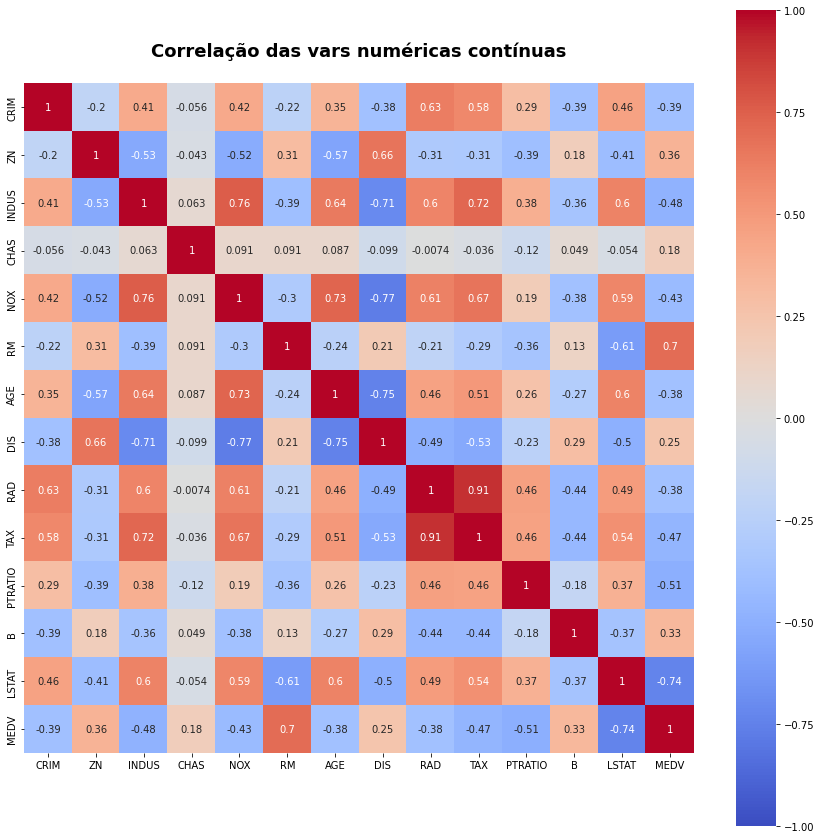

In [57]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize = (15, 15))
sns.heatmap(df_boston.corr(), cmap = 'coolwarm', vmin = -1.0, 
            annot = True, vmax = 1.0, square=True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

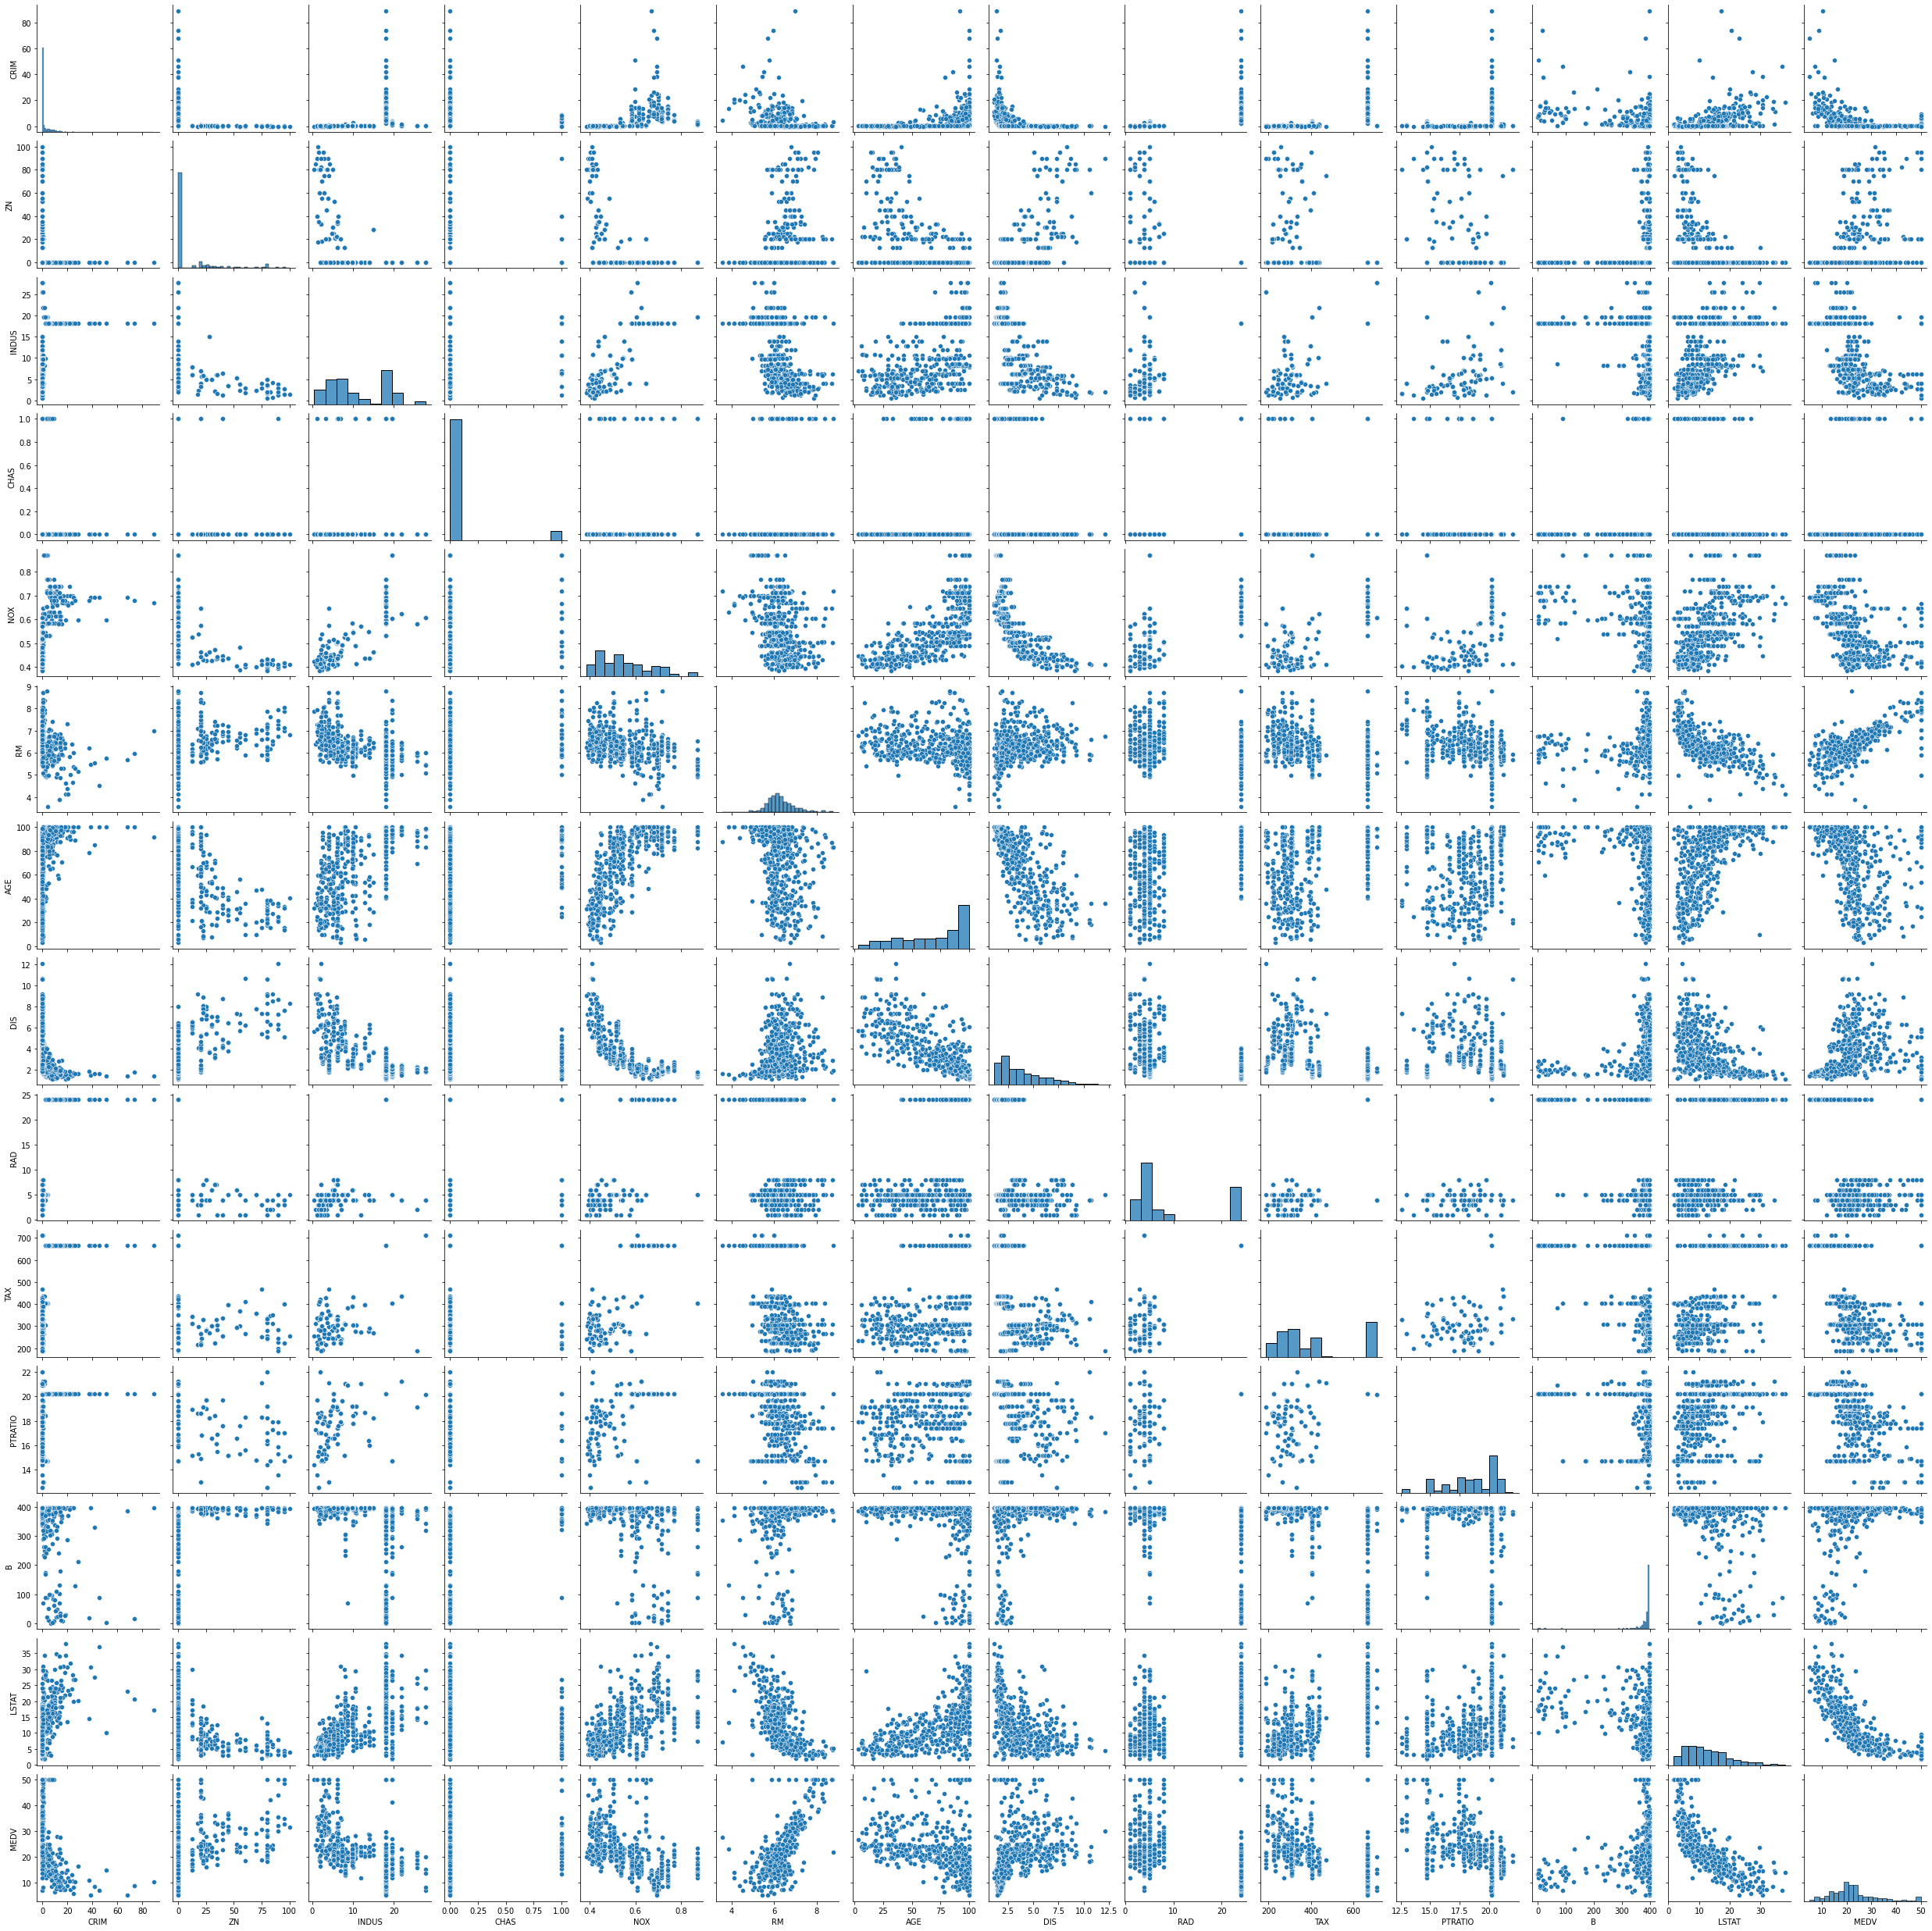

In [58]:
# com a função ".pairplot()" da biblioteca seaborn plotando diversos gráficos
sns.pairplot(data=df_boston);

In [59]:
# correlação das variáveis entre a variável alvo
df_boston.corr()['MEDV'].round(4)*100

CRIM       -38.83
ZN          36.04
INDUS      -48.37
CHAS        17.53
NOX        -42.73
RM          69.54
AGE        -37.70
DIS         24.99
RAD        -38.16
TAX        -46.85
PTRATIO    -50.78
B           33.35
LSTAT      -73.77
MEDV       100.00
Name: MEDV, dtype: float64

In [60]:
# realizando um ponto de corte da correlação entre as variáveis - maior e/ou igual a 0.4
vars_num_corr = df_boston.corr()['MEDV'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.4].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (outcome). \nSegue:')
important_feats

Há 6 atributos com forte correlação com a variável alvo (outcome). 
Segue:


RM         0.695360
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

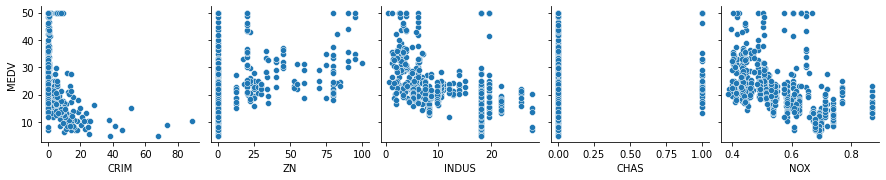

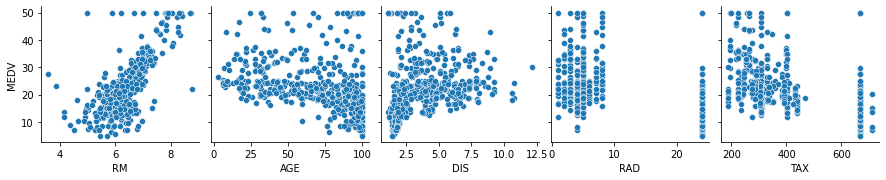

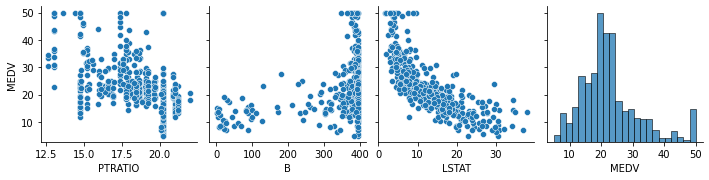

In [61]:
# plotando gráfico de correlação 
for i in range(0, len(df_boston.columns), 5):
    sns.pairplot(data=df_boston, x_vars=df_boston.columns[i:i + 5], 
                 y_vars=['MEDV']);

In [62]:
# separando as variáveis explicativas (X) e a resposta (y)
X, y = df_boston.iloc[:, :-1], df_boston.iloc[:, -1]

In [63]:
# visualizando a dimensão da variável X e as 10 primeiras linhas
display(
    f'Dimensão: {X.shape[0]} linhas e {X.shape[1]} colunas.',
    X[:10]
)

'Dimensão: 506 linhas e 13 colunas.'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [64]:
# visualizando a dimensão da variável y e os 10 primeiros dados
print(
    f'Tamanho: {len(y)} observações.', 
    y[:10], 
    sep='\n\n')

Tamanho: 506 observações.

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64


Agora irei converter o conjunto de dados em uma estrutura de dados otimizada chamada `Dmatrix` que o XGBoost suporta e oferece ganhos de desempenho e eficiência.

In [65]:
# utilizando a função ".DMatrix()" e passando como argumentos 
# o objeto X (variáveis explicativas) e o y (variável resposta)
boston_dmatrix = xgb.DMatrix(data=X,label=y)

In [66]:
# visualizando o tipo do objeto
type(boston_dmatrix)

xgboost.core.DMatrix

In [67]:
# instanciando os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.3, # reservando 30% para teste
                                                random_state=42)

**Aplicando o modelo básico (baseline)**

In [68]:
# instanciando o modelo de base
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                             learning_rate = 0.09, max_depth = 5, alpha = 10, 
                             n_estimators = 1_500)

In [69]:
# treinando o modelo com os dados de treino - Xtrain e ytrain
xgb_model.fit(Xtrain, ytrain)

# realizando as predições com o modelo após seu treinamento
ypred = xgb_model.predict(Xtest)

In [70]:
# métricas de avaliação do modelo
print(
    f'Erro Quadrático Médio (MSE): {mean_squared_error(ytest, ypred).round(3)}',                    
    f'Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mean_squared_error(ypred, ytest)).round(3)}',                                         
    f'Erro Absoluto Médio (MAE): {mean_absolute_error(ytest, ypred).round(3)}',
    f'R-Quadrado (R2): {r2_score(ytest, ypred).round(3)}',  
    sep='\n'                       
)

Erro Quadrático Médio (MSE): 17.022
Raiz do Erro Quadrático Médio (RMSE): 4.126
Erro Absoluto Médio (MAE): 2.851
R-Quadrado (R2): 0.802


In [71]:
# função para ajuste do R2
def adjusted_r2(ytest, ypred, Xtrain):
    
  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(ytest, ypred)) * (len(ytest) - 1)) / 
          (len(ytest) - Xtrain.shape[1] - 1))
    
  return adj_r2

In [72]:
# visualizando o resultado o R2 ajustado
print(f'R2 ajustado: {adjusted_r2(ytest, ypred, Xtrain).round(3)}')

R2 ajustado: 0.794


**Validação cruzada k-fold usando XGBoost**

In [73]:
# instanciando um dicionário com os hiperparâmetros
params = {
    'learning_rate': 0.09,
    'n_estimators': 1_500,
    'max_depth': 5,
    'alpha': 10,
    'min_child_weight': 4,
    'subsample': 0.9,
    'colsample_bynode': 0.5,
    'colsample_bytree': 0.3,
    'random_state': 42, 
    'num_parallel_tree': 3,
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'n_jobs': -1,
    # gpu_id='0',           # parâmetro para utilizar a gpu do colab
    # tree_method='exact'   
}

In [74]:
# instanciando o objeto com os parâmetros e os demais argumentos
cv_results = xgb.cv(dtrain=boston_dmatrix, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics= 'rmse', as_pandas=True, seed=42)

In [75]:
display(
    cv_results.head(10), 
    cv_results.tail(10)
)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.941286,0.114220,21.922597,1.035524
1,20.217191,0.090279,20.216698,1.051032
2,18.639700,0.085496,18.649973,1.040143
3,17.197184,0.102890,17.215864,1.004083
4,15.912975,0.115200,15.941659,0.987735
5,14.762881,0.120200,14.800100,0.966249
6,13.722167,0.129709,13.773275,0.935866
7,12.760305,0.138033,12.843687,0.918964
8,11.889179,0.133991,11.987069,0.886014
9,11.126785,0.154013,11.230297,0.879501


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
40,3.751013,0.133335,4.519422,0.542237
41,3.692638,0.133553,4.480631,0.542875
42,3.644868,0.135633,4.440223,0.543821
43,3.583290,0.118532,4.386635,0.539195
44,3.530875,0.112090,4.351408,0.544711
45,3.481708,0.106415,4.317201,0.537653
46,3.447008,0.109155,4.293539,0.539187
47,3.405445,0.101903,4.263259,0.540066
48,3.363643,0.099151,4.229639,0.543433
49,3.331352,0.088497,4.208786,0.546900


In [76]:
print(
    (cv_results['train-rmse-mean']).tail(1),
    (cv_results['test-rmse-mean']).tail(1),
    sep='\n\n'
    )

49    3.331352
Name: train-rmse-mean, dtype: float64

49    4.208786
Name: test-rmse-mean, dtype: float64


**Visualizando as árvores e importância dos recursos**

In [77]:
xgb_model = xgb.train(params=params, dtrain=boston_dmatrix, 
                      num_boost_round=10)

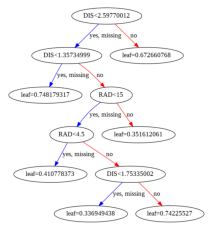

In [78]:
xgb.plot_tree(xgb_model, num_trees=3)

# plt.figure(figsize = (18, 10))
plt.rcParams['figure.figsize'] = [18, 10]
plt.show();

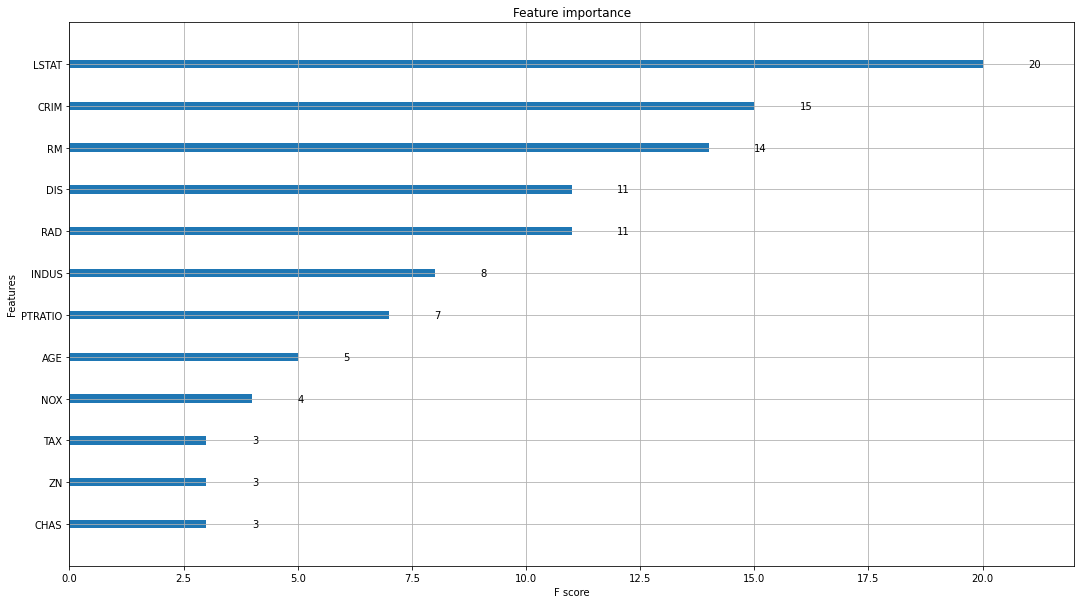

In [79]:
xgb.plot_importance(xgb_model)

# plt.figure(figsize = (15, 10))
plt.rcParams['figure.figsize'] = [15, 10]
plt.show();

## **Classificação**

### **Breast Cancer Dataset**

**Classificação binária (duas classes)**

In [80]:
cancer = load_breast_cancer()

In [81]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [82]:
# criando um dataframe com o dicionário de dados
df_cancer = pd.DataFrame(
    cancer.data,
    columns=cancer.feature_names
)

# inserindo a variável alvo no dataframe criado
df_cancer['diagnostic'] = cancer.target

# visualizando as 5 primeiras linhas
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [83]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [84]:
print(
    df_cancer['diagnostic'].unique(),
    df_cancer['diagnostic'].value_counts(),
    sep='\n\n'
)

[0 1]

1    357
0    212
Name: diagnostic, dtype: int64


In [85]:
X = df_cancer.drop('diagnostic', axis=1)
y = df_cancer['diagnostic']

In [86]:
# instanciando os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.3, # reservando 30% para teste
                                                random_state=42)

In [87]:
model_xgb = xgb.XGBClassifier(learning_rate=0.08,
                              n_estimators=1_500,
                              max_depth=6,
                              min_child_weight=4,
                              subsample=0.9,
                              colsample_bynode=0.5,
                              random_state=42, 
                              num_parallel_tree=3,
                              booster='gbtree',
                              objective='binary:logistic',
                              n_jobs=-1,
                             #  gpu_id='0',           # parâmetro para utilizar a gpu do colab
                             #  tree_method='exact'   
                             ) 

In [88]:
model_xgb.fit(Xtrain, ytrain)
ypred = model_xgb.predict(Xtest)

In [89]:
print(confusion_matrix(ytest, ypred))

[[131   9]
 [ 12 247]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.96      0.95      0.96       259

    accuracy                           0.95       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.95      0.95      0.95       399



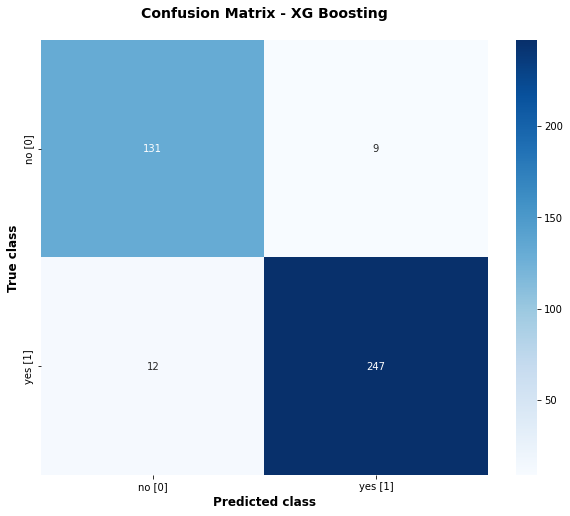

In [90]:
# imprimindo o relatório de classificação dos dados de teste
print(classification_report(ytest, ypred))

# gráfico da matriz de confusão do modelo xgb_model
xgb_cm = confusion_matrix(ytest, ypred)

plt.figure(figsize=(10, 8))
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='.0f', 
            xticklabels=['no [0]', 'yes [1]'], 
            yticklabels=['no [0]', 'yes [1]']
            )

plt.xlabel('Predicted class', fontsize=12, fontweight='bold')
plt.ylabel('True class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - XG Boosting\n', 
          {'fontsize': 14,'fontweight': 'bold'});

In [91]:
# realizando um "for" para definir o "corte" das probabilidades 
# realizadas pelo modelo e instanciando as classes [0 - não e 1 - sim]
for i in range(0, len(ypred)):
    if ypred[i] >= 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [92]:
# realizando avaliação do modelo
acc_model_xgb = accuracy_score(ypred, ytest)
acc_model_xgb.round(4)

0.9474

**Parada antecipada (Early stopping)**

O número de árvores aumentadas (`n_estimators`) para treinar é ilimitado, em vez disso, o treinamento continua até que a validação não tenha melhorado em n rodadas (`n_rounds`).

In [93]:
df_cancer = pd.DataFrame(cancer.data)
df_cancer.columns = cancer.feature_names

df_cancer['diagnostic'] = cancer.target

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [94]:
print(
    df_cancer['diagnostic'].unique(),
    df_cancer['diagnostic'].value_counts(),
    sep='\n\n'
)

[0 1]

1    357
0    212
Name: diagnostic, dtype: int64


In [95]:
X = df_cancer.drop('diagnostic', axis=1)
y = df_cancer['diagnostic']

In [96]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.3,
                                                random_state=42)

In [97]:
xgb_model = xgb.XGBClassifier(learning_rate=0.08,
                              n_estimators=1_500,
                              cv=10,
                              max_depth=6,
                              min_child_weight=4,
                              subsample=0.9,
                              colsample_bynode=0.5,
                              random_state=42, 
                              num_parallel_tree=3,
                              booster='gbtree',
                              objective='binary:logistic',
                              n_jobs=-1,
                              eval_metric='auc',
                            #   gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #   tree_method='exact'   
                             ) 

In [98]:
xgb_model.fit(Xtrain, ytrain, early_stopping_rounds=100, eval_set=[(Xtest, ytest)])

[0]	validation_0-auc:0.985817
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.990079
[2]	validation_0-auc:0.99199
[3]	validation_0-auc:0.992357
[4]	validation_0-auc:0.992063
[5]	validation_0-auc:0.992063
[6]	validation_0-auc:0.993092
[7]	validation_0-auc:0.992945
[8]	validation_0-auc:0.993533
[9]	validation_0-auc:0.992357
[10]	validation_0-auc:0.992504
[11]	validation_0-auc:0.992504
[12]	validation_0-auc:0.992504
[13]	validation_0-auc:0.992357
[14]	validation_0-auc:0.992504
[15]	validation_0-auc:0.992798
[16]	validation_0-auc:0.993092
[17]	validation_0-auc:0.992945
[18]	validation_0-auc:0.993092
[19]	validation_0-auc:0.993239
[20]	validation_0-auc:0.992945
[21]	validation_0-auc:0.992504
[22]	validation_0-auc:0.991917
[23]	validation_0-auc:0.992651
[24]	validation_0-auc:0.991917
[25]	validation_0-auc:0.992945
[26]	validation_0-auc:0.993239
[27]	validation_0-auc:0.993386
[28]	validation_0-auc:0.993974
[29]	validation_0-auc:0.99368
[30]	validation_0

XGBClassifier(colsample_bynode=0.5, cv=10, eval_metric='auc',
              learning_rate=0.08, max_depth=6, min_child_weight=4,
              n_estimators=1500, n_jobs=-1, num_parallel_tree=3,
              random_state=42, subsample=0.9)

In [99]:
ypred = xgb_model.predict(Xtest)

In [100]:
for i in range(0, len(ypred)):
    if ypred[i] >= 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

In [101]:
print(
    f'Acurácia: {accuracy_score(ytest, ypred).round(4)}', 
    f'Matriz de confusão: \n{confusion_matrix(ytest, ypred)}',
    sep='\n\n'
)

Acurácia: 0.9649

Matriz de confusão: 
[[ 60   3]
 [  3 105]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



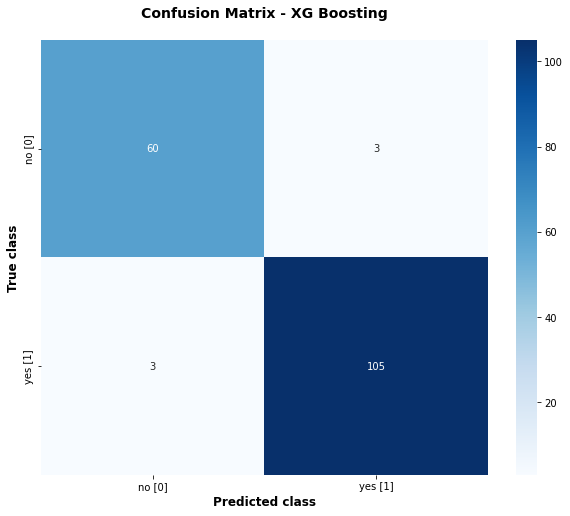

In [102]:
# imprimindo o relatório de classificação dos dados de teste
print(classification_report(ytest, ypred))

# gráfico da matriz de confusão do modelo xgb_model
xgb_cm = confusion_matrix(ytest, ypred)

plt.figure(figsize=(10, 8))
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='.0f', 
            xticklabels=['no [0]', 'yes [1]'], 
            yticklabels=['no [0]', 'yes [1]']
            )

plt.xlabel('Predicted class', fontsize=12, fontweight='bold')
plt.ylabel('True class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - XG Boosting\n', 
          {'fontsize': 14,'fontweight': 'bold'});

In [103]:
print('best score: {0} | best iteration: {1} | best ntree limit {2}'.format(xgb_model.best_score, 
                                                                          xgb_model.best_iteration, 
                                                                          xgb_model.best_ntree_limit))

best score: 0.995885 | best iteration: 71 | best ntree limit 216


In [104]:
xgb_model.fit(Xtrain, ytrain, early_stopping_rounds=100, eval_set=[(Xtest, ytest)], verbose=False)

XGBClassifier(colsample_bynode=0.5, cv=10, eval_metric='auc',
              learning_rate=0.08, max_depth=6, min_child_weight=4,
              n_estimators=1500, n_jobs=-1, num_parallel_tree=3,
              random_state=42, subsample=0.9)

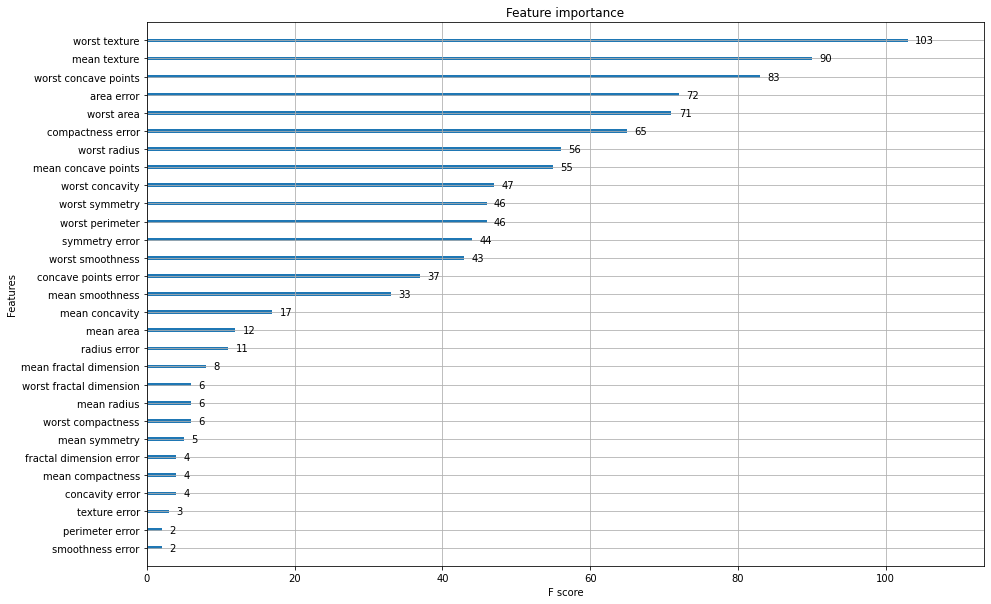

In [105]:
# plt.figure(figsize=(15, 12))
xgb.plot_importance(xgb_model);

**Plotando**

In [106]:
import graphviz

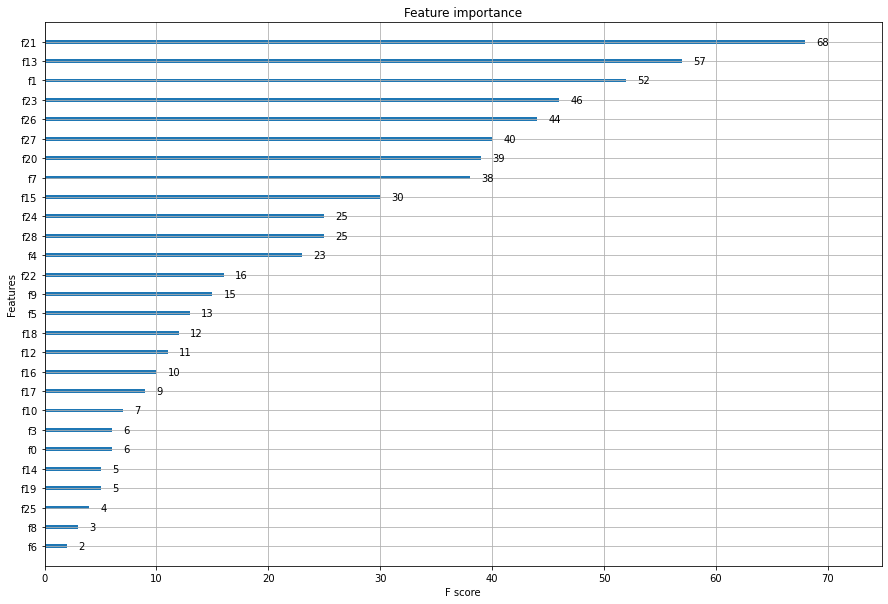

In [107]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective='binary:logistic', cv=10, n_estimators=1_500,
                              learning_rate=0.08, random_state=42, eval_metric='auc')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

xgb_model.fit(Xtrain, ytrain, early_stopping_rounds=100, eval_set=[(Xtest, ytest)], verbose=False)

xgb.plot_importance(xgb_model);

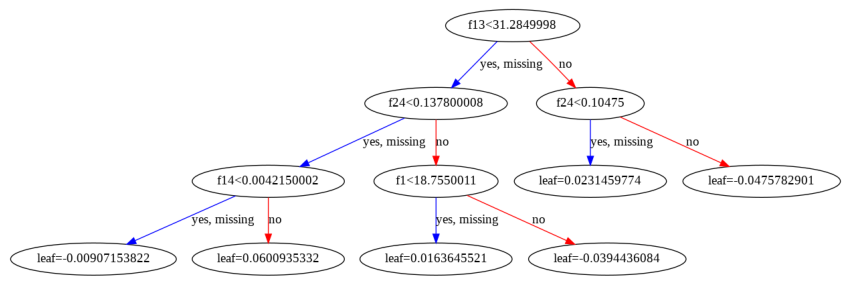

In [108]:
xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration);

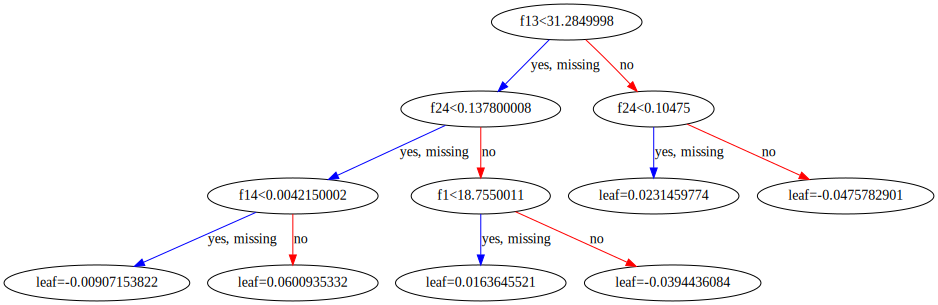

In [109]:
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

### **Wine Dataset**

**Classificação multiclasse**

In [110]:
wine = load_wine()

In [111]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [112]:
# instanciando o dicionário de dados em um dataframe
df_wine = pd.DataFrame(
    wine.data,
    columns=wine.feature_names
)

# inserindo a variável alvo no dataframe criado
df_wine['class'] = wine.target

# renomeando o atributo "od280/od315_of_diluted_wines" para "est_diluted_wines"
df_wine.rename(columns={
    'od280/od315_of_diluted_wines': 'test_diluted_wines'
}, inplace=True)

# visualizando as 5 primeiras linhas
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,test_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [113]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   alcalinity_of_ash     178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  test_diluted_wines    178 non-null    float64
 12  proline               178 non-null    float64
 13  class                 178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [114]:
print(
    f'Classes: {df_wine["class"].unique()}',
    f'Distribuição das instâncias: \n{df_wine["class"].value_counts()}',
    sep='\n\n'
)

Classes: [0 1 2]

Distribuição das instâncias: 
1    71
0    59
2    48
Name: class, dtype: int64


In [115]:
X = df_wine.drop('class', axis=1)
y = df_wine['class']

In [116]:
# instanciando os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.3, # reservando 30% para teste
                                                random_state=42)

In [117]:
xgb_model = xgb.XGBClassifier(learning_rate=0.08,
                              n_estimators=1_500,
                              max_depth=6,
                              min_child_weight=4,
                              subsample=0.9,
                              colsample_bynode=0.5,
                              random_state=42, 
                              num_parallel_tree=3,
                              booster='gbtree',
                              objective='multi:softprob',
                              n_jobs=-1,
                             #  gpu_id='0',           # parâmetro para utilizar a gpu do colab
                             #  tree_method='exact'   
                             ) 

In [118]:
model_xgb.fit(Xtrain, ytrain)
ypred = model_xgb.predict(Xtest)

In [119]:
print(confusion_matrix(ytest, ypred))

[[44  0  0]
 [ 4 45  1]
 [ 0  3 28]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       0.94      0.90      0.92        50
           2       0.97      0.90      0.93        31

    accuracy                           0.94       125
   macro avg       0.94      0.93      0.94       125
weighted avg       0.94      0.94      0.94       125



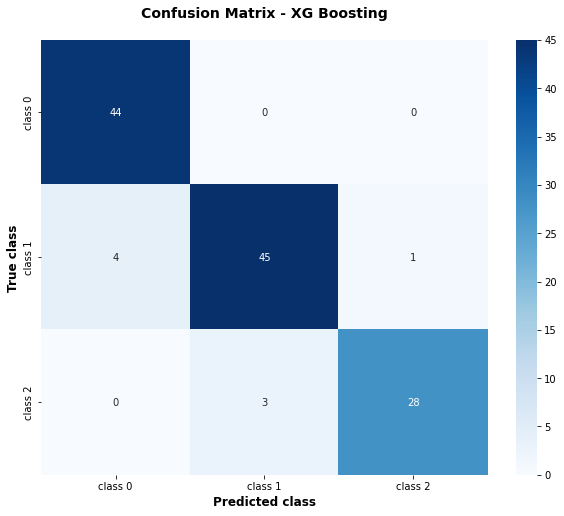

In [120]:
# imprimindo o relatório de classificação dos dados de teste
print(classification_report(ytest, ypred))

# gráfico da matriz de confusão do modelo xgb_model
xgb_cm = confusion_matrix(ytest, ypred)

plt.figure(figsize=(10, 8))
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='.0f', 
            xticklabels=['class 0', 'class 1', 'class 2'], 
            yticklabels=['class 0', 'class 1', 'class 2']
            )

plt.xlabel('Predicted class', fontsize=12, fontweight='bold')
plt.ylabel('True class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - XG Boosting\n', 
          {'fontsize': 14,'fontweight': 'bold'});

## **Material de apoio**

- Como avaliar seu modelo de regressão
 - https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96<br><br>

- Como avaliar seu modelo de classificação
 - https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-34e6f6011108

